In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import rasterio as rio
import geopandas as gpd

import os
import json

from pprint import pprint
from pyretechnics.fuel_models import get_fuel_model, moisturize

from_vals = [
    91,92,93,98,99,
    101,102,103,104,105,106,107,108,109,
    121,122,123,124,
    141,142,143,144,145,146,147,148,149,
    161,162,163,164,165,
    181,182,183,184,185,186,187,188,189,
    201,202,203,204
]

to_vals = [
    1,1,1,1,1,
    2,2,2,2,2,2,2,2,2,
    3,3,3,3,
    4,4,4,4,4,4,4,4,4,
    5,5,5,5,5,
    6,6,6,6,6,6,6,6,6,
    7,7,7,7
]

In [2]:


static_fuel_model_number  = 1   # R01
dynamic_fuel_model_number = 101 # GR1

static_fuel_model  = get_fuel_model(static_fuel_model_number)
dynamic_fuel_model = get_fuel_model(dynamic_fuel_model_number)

print("Static Fuel Model: R01")
pprint(static_fuel_model)

print("\nDynamic Fuel Model: GR1")
pprint(dynamic_fuel_model)

fuel_moisture = (
    0.05, # dead_1hr
    0.10, # dead_10hr
    0.15, # dead_100hr
    0.00, # dead_herbaceous (will be set by moisturize for dynamic fuel models)
    0.30, # live_herbaceous
    0.50, # live_woody
)

low_moisture = (
    0.03, # dead_1hr
    0.04, # dead_10hr
    0.05, # dead_100hr
    0.00, # dead_herbaceous (will be set by moisturize for dynamic fuel models)
    1.20, # live_herbaceous
    1.50, # live_woody
)

Static Fuel Model: R01
{'M_f': (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'M_x': (0.11999999731779099,
         0.11999999731779099,
         0.11999999731779099,
         0.0,
         0.0,
         0.0),
 'S_T': (0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574),
 'S_e': (0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582),
 'burnable': True,
 'delta': 1.0,
 'dynamic': False,
 'exp_A_sigma': (0.9613386392593384, 0.0, 0.0, 0.0, 0.0, 0.0),
 'f_i': (0.0, 0.0),
 'f_ij': (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'firemod_size_classes': (1.0, 6.0, 6.0, 6.0, 6.0, 6.0),
 'g_ij': (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'h': (8000.0, 8000.0, 8000.0, 8000.0, 8000.0, 8000.0),
 'number': 1,
 'rho_p': (32.0, 32.0, 32.0, 32.0, 32.0, 32.0),
 'sigma': (3500.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [3]:
print("Moisturized Static Fuel Model: R01")
pprint(moisturize(static_fuel_model, fuel_moisture))

Moisturized Static Fuel Model: R01
{'M_f': (0.05000000074505806,
         0.10000000149011612,
         0.15000000596046448,
         0.0,
         0.30000001192092896,
         0.5),
 'M_x': (0.11999999731779099,
         0.11999999731779099,
         0.11999999731779099,
         0.0,
         0.11999999731779099,
         0.11999999731779099),
 'S_T': (0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574),
 'S_e': (0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582),
 'burnable': True,
 'delta': 1.0,
 'dynamic': False,
 'exp_A_sigma': (0.9613386392593384, 0.0, 0.0, 0.0, 0.0, 0.0),
 'f_i': (1.0, 0.0),
 'f_ij': (1.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'firemod_size_classes': (1.0, 6.0, 6.0, 6.0, 6.0, 6.0),
 'g_ij': (1.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'h': (8

In [4]:
print("\nMoisturized Dynamic Fuel Model: GR1")
pprint(moisturize(dynamic_fuel_model, fuel_moisture))


Moisturized Dynamic Fuel Model: GR1
{'M_f': (0.05000000074505806,
         0.10000000149011612,
         0.15000000596046448,
         0.05000000074505806,
         0.30000001192092896,
         0.5),
 'M_x': (0.15000000596046448,
         0.15000000596046448,
         0.15000000596046448,
         0.15000000596046448,
         0.15000000596046448,
         0.15000000596046448),
 'S_T': (0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574,
         0.05550000071525574),
 'S_e': (0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582,
         0.009999999776482582),
 'burnable': True,
 'delta': 0.4000000059604645,
 'dynamic': True,
 'exp_A_sigma': (0.9391995668411255,
                 0.281941682100296,
                 0.010051836259663105,
                 0.9333266615867615,
                 0.77880078554153

---

Load Dataset

---

In [5]:
root_file = os.path.join('D:\\','SIG','fuels','eo-fuels-extrapolation','data','FuelsData')

pyromes= [
    33
]
eval_pyromes = [
    30
]
years = [2023]

def load_data(pyromes,years):
    yearly_frames = []
    for pyrome in pyromes:
        for year in years:
            year_csv_file = os.path.join(root_file,f'stratified_sample_fbfm40_30m_{pyrome}_{year}.csv')
            year_fuels_sample = pd.read_csv(year_csv_file)
            yearly_frames.append(year_fuels_sample)

    fuels_frame = pd.concat(yearly_frames)

    return fuels_frame
fuels_sample = load_data(pyromes,years)

feature_list = fuels_sample.columns.to_list()
feature_list.remove('system:index')
feature_list.remove('.geo')
for x in ['EVT','BPS','EVC','EVH']:
    feature_list.remove(x)

alphaearth_features = [f'A{str(i).zfill(2)}' for i in range(64)]
label_list = ['FBFM40','FBFM40Parent']
feature_list_wo_alphaearth = [feature for feature in feature_list if feature not in (alphaearth_features +label_list)]

fuels_labels = fuels_sample[label_list]

# fuels_data_alphaearth = fuels_sample[alphaearth_features]
# fuels_data_wo_alphaearth = fuels_sample[feature_list_wo_alphaearth]
# fuels_data_full = fuels_sample[alphaearth_features + feature_list_wo_alphaearth]

In [6]:
fuels_sample_loc = fuels_sample.copy()

geo = fuels_sample['.geo']
fuels_sample_loc['longitude'], fuels_sample_loc['latitude'] = geo.map(lambda x: list(json.loads(x)['coordinates'])[0]), geo.map(lambda x: list(json.loads(x)['coordinates'])[1])

fuels_sample_loc[['latitude','longitude']]
fuels_sample_loc.drop(columns=['system:index','.geo','EVT','BPS','EVH','EVC'],inplace=True)

fuels_sample_gdf = gpd.GeoDataFrame(fuels_sample_loc,geometry=gpd.points_from_xy(fuels_sample_loc.longitude,fuels_sample_loc.latitude),crs='EPSG:4326').to_crs('EPSG:5070')

---

EVC, EVH, EVT, BPS Examination

---

In [7]:
evt_file = os.path.join('D:\\','SIG','fuels','eo-fuels-extrapolation','data','LF2023_EVT_CONUS')

evt_classes_csv = os.path.join(evt_file,'CSV_Data','LF2023_EVT.csv')

evt_tifffile =os.path.join(evt_file,'Tif','LF2023_EVT_CONUS.tif')

evt_classes = pd.read_csv(evt_classes_csv)

evt_data = rio.open(evt_tifffile)

In [8]:
evc_file = os.path.join('D:\\','SIG','fuels','eo-fuels-extrapolation','data','LF2023_EVC_CONUS')
evc_data_description_csv = os.path.join(evc_file,'CSV_Data','LF2023_EVC.csv')

evc_tifffile =os.path.join(evc_file,'Tif','LF2023_EVC_CONUS.tif')

evc_data_description  = pd.read_csv(evc_data_description_csv)
evc_data = rio.open(evc_tifffile)

In [9]:
evh_file = os.path.join('D:\\','SIG','fuels','eo-fuels-extrapolation','data','LF2023_EVH_CONUS')
evh_data_description_csv = os.path.join(evh_file,'CSV_Data','LF2023_EVH.csv')

evh_tifffile =os.path.join(evh_file,'Tif','LF2023_EVH_CONUS.tif')

evh_data_description  = pd.read_csv(evh_data_description_csv)
evh_data = rio.open(evh_tifffile)

In [10]:
bps_file = os.path.join('D:\\','SIG','fuels','eo-fuels-extrapolation','data','LF2020_BPS_220_CONUS')

bps_classes_csv = os.path.join(bps_file,'CSV_Data','LF20_BPS_220.csv')

bps_tifffile =os.path.join(bps_file,'Tif','LC20_BPS_220.tif')

bps_classes = pd.read_csv(bps_classes_csv)

bps_data = rio.open(bps_tifffile)

In [11]:
coord_list = [(x,y) for x,y in zip(fuels_sample_gdf['geometry'].x,fuels_sample_gdf['geometry'].y)]
fuels_sample_gdf['evt'] = [x[0] for x in evt_data.sample(coord_list)]
# fuels_sample_gdf['evc'] = [x[0] for x in evc_data.sample(coord_list)]
# fuels_sample_gdf['evh'] = [x[0] for x in evh_data.sample(coord_list)]
# fuels_sample_gdf['bps'] = [x[0] for x in bps_data.sample(coord_list)]

In [12]:
fuels_sample_gdf = fuels_sample_gdf.merge(evt_classes[['LFRDB','EVT_NAME','EVT_ORDER','EVT_CLASS','EVT_SBCLS']],left_on='evt',right_on='LFRDB')

In [13]:
fuels_sample_gdf[['evt','EVT_NAME','EVT_CLASS','EVT_SBCLS']]

,evt,EVT_NAME,EVT_CLASS,EVT_SBCLS
0,7984,Western Warm Temperate Row Crop,Herbaceous - grassland,Annual Graminoid/Forb
1,9062,Central California Coast Ranges Cliff and Canyon,Sparsely vegetated,Sparsely vegetated
2,7297,Developed-Medium Intensity,No Dominant Lifeform,Developed
3,7984,Western Warm Temperate Row Crop,Herbaceous - grassland,Annual Graminoid/Forb
4,7299,Developed-Roads,No Dominant Lifeform,Developed
...,...,...,...,...
24875,7177,California Coastal Closed-Cone Conifer Forest ...,Closed tree canopy,Evergreen closed tree canopy
24876,7177,California Coastal Closed-Cone Conifer Forest ...,Closed tree canopy,Evergreen closed tree canopy
24877,7177,California Coastal Closed-Cone Conifer Forest ...,Closed tree canopy,Evergreen closed tree canopy
24878,7177,California Coastal Closed-Cone Conifer Forest ...,Closed tree canopy,Evergreen closed tree canopy


In [14]:
fuels_sample_gdf['EVT_SBCLS'].unique() 

<StringArray>
[                       'Annual Graminoid/Forb',
                           'Sparsely vegetated',
                                    'Developed',
                                'Non-vegetated',
                          'Perennial graminoid',
          'Mixed evergreen-deciduous shrubland',
                   'Evergreen open tree canopy',
                          'Evergreen shrubland',
                'Perennial graminoid grassland',
                   'Deciduous open tree canopy',
   'Mixed evergreen-deciduous open tree canopy',
                 'Deciduous sparse tree canopy',
                 'Evergreen sparse tree canopy',
 'Mixed evergreen-deciduous sparse tree canopy',
                 'Evergreen closed tree canopy',
                          'Deciduous shrubland']
Length: 16, dtype: str

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

fuels_inputs = fuels_sample_gdf[feature_list]
fuels_inputs_alphaearth = fuels_sample_gdf[alphaearth_features]
fuels_inputs_woalphaearth = fuels_sample_gdf[feature_list_wo_alphaearth]

fuels_target = fuels_sample_gdf['EVT_SBCLS']

scaler = StandardScaler()
encoder = LabelEncoder()

fuels_inputs_scaled = scaler.fit_transform(fuels_inputs)
fuels_inputs_alphaearth_scaled = scaler.fit_transform(fuels_inputs_alphaearth)
fuels_inputs_woalphaearth_scaled = scaler.fit_transform(fuels_inputs_woalphaearth)


fuels_sample_viz = fuels_sample_gdf.copy()

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

fuels_pca = pca.fit_transform(fuels_inputs_woalphaearth_scaled)

fuels_sample_viz['PC1'] = fuels_pca[:,0]
fuels_sample_viz['PC2'] = fuels_pca[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

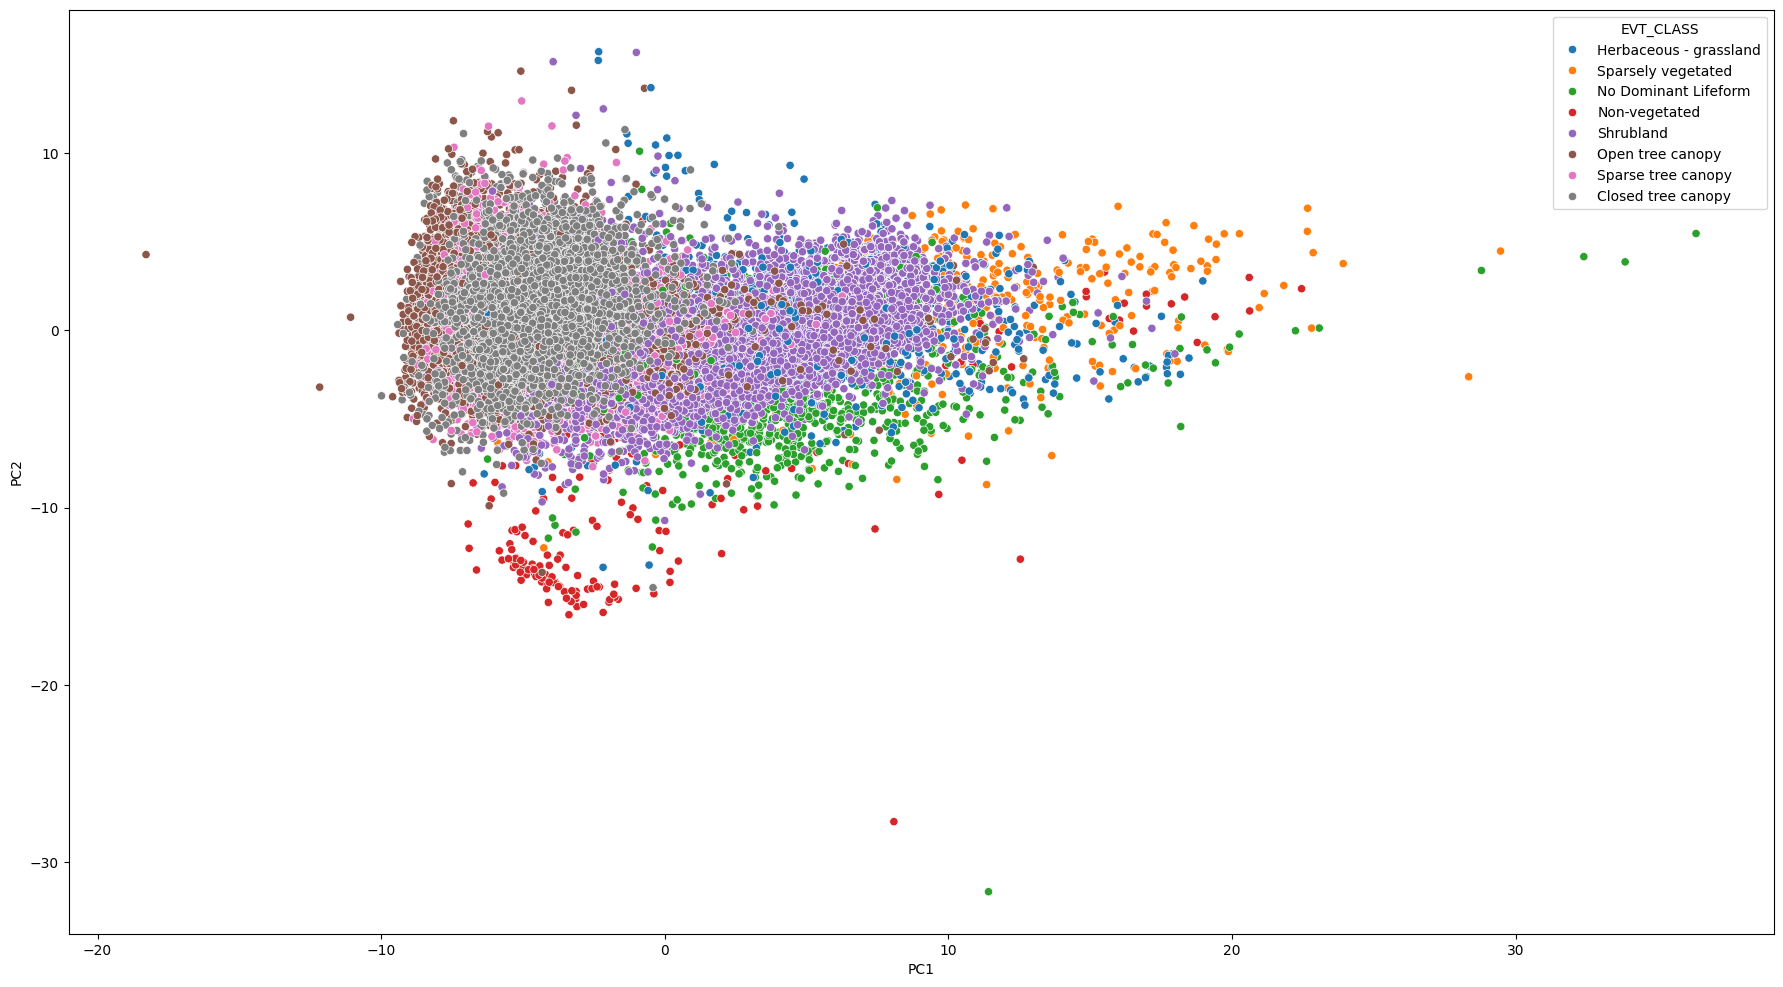

In [60]:
plt.figure(figsize=(22,12))

sns.scatterplot(fuels_sample_viz,x='PC1',y='PC2',hue='EVT_CLASS')

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=60,
    early_exaggeration=12,
    max_iter=2000,
    n_jobs=-1
)

fuels_tsne = tsne.fit_transform(fuels_inputs_scaled)

fuels_sample_viz['TSNE1'] = fuels_tsne[:,0]
fuels_sample_viz['TSNE2'] = fuels_tsne[:,1]

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

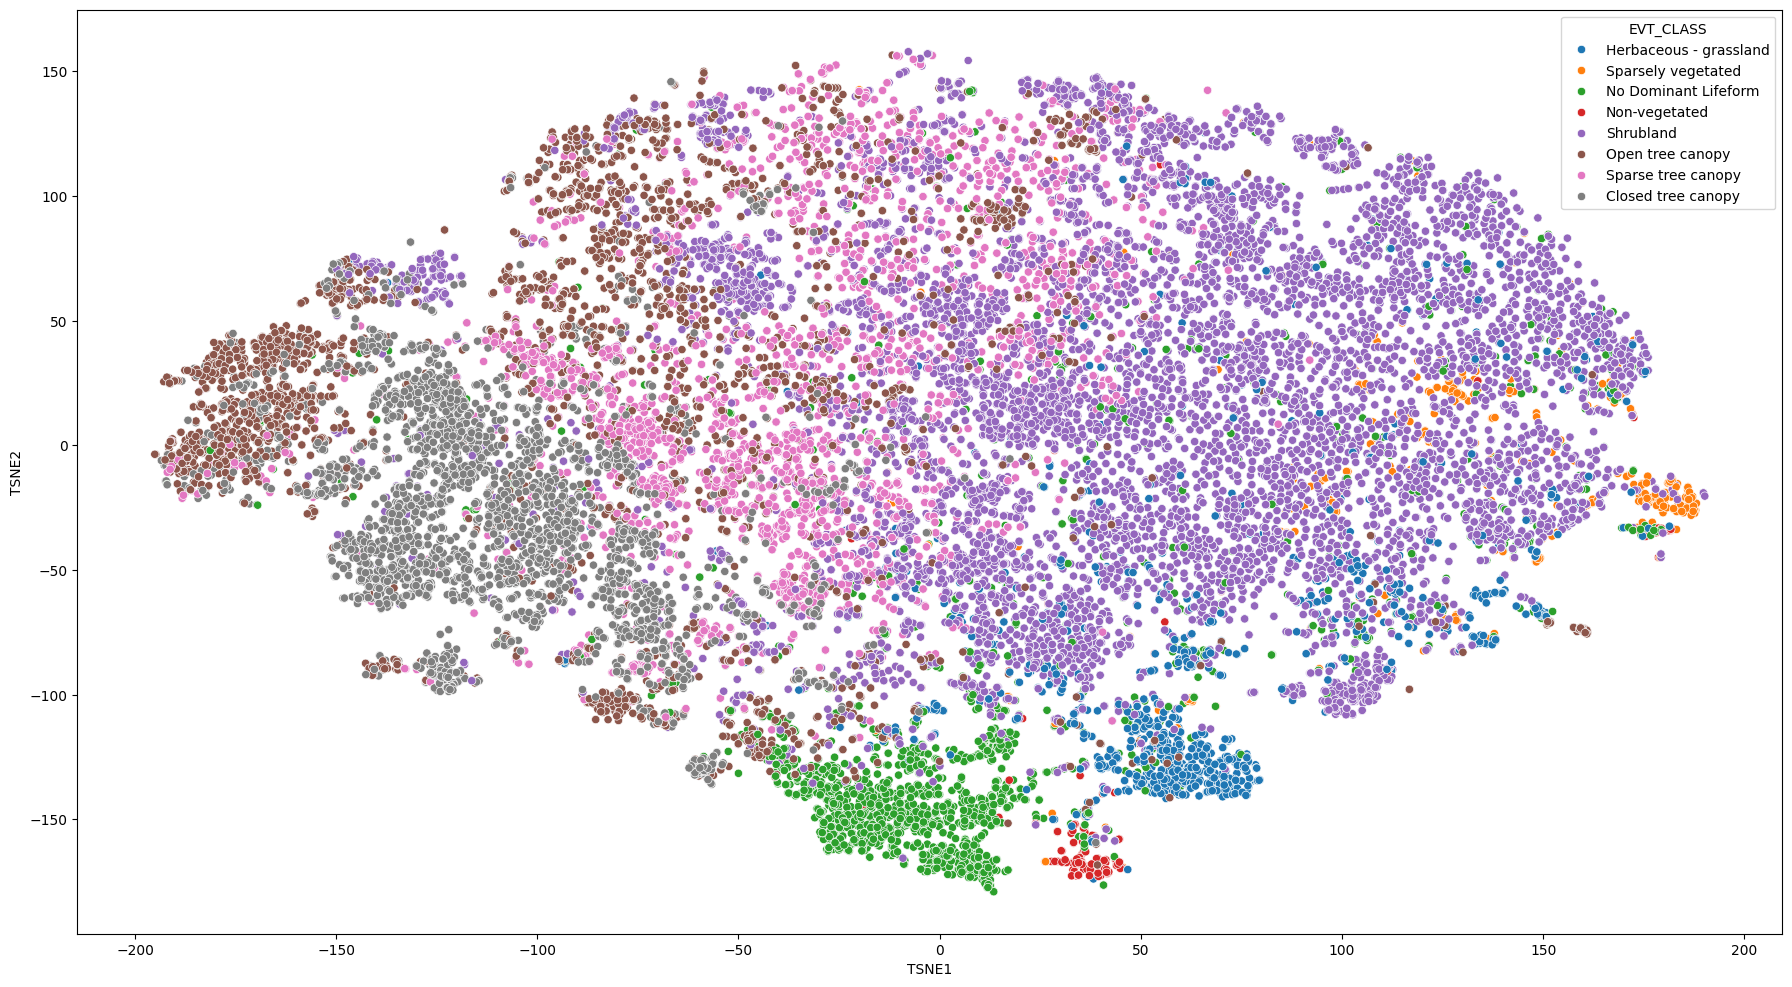

In [66]:
plt.figure(figsize=(22,12))

sns.scatterplot(fuels_sample_viz,x='TSNE1',y='TSNE2',hue='EVT_CLASS')

In [ ]:
# import pyretechnics.fuel_models as pfm


# m_per_ft = 0.3048
# s_per_min = 60


# def compute_sigma(fm):
#     """
#     Computes the effective SAV ratio for a fuel model, in ft^{-1}.
#     """
#     sigmas = fm['sigma']
#     w_o = fm['w_o']
#     rho_p = fm['rho_p']
#     s = 0.0
#     At = 0.0
#     for w, r, sigma in zip(w_o, rho_p, sigmas):
#         Aij = sigma * w / r
#         At += Aij
#         s += Aij * sigma
#     if At == 0.0:
#         return 0.0
#     sigma = s / At
#     return sigma


# def compute_beta_op(sigma_per_ft: float) -> float:
#     if sigma_per_ft == 0.0:
#         return 0.0
#     return 3.348 * (sigma_per_ft ** -0.8189)


# def compute_mean_packing_ratio(fm: dict) -> float:
#     delta = fm['delta']
#     w_o = fm['w_o']
#     rho_p = fm['rho_p']
#     s = 0.0
#     for w, r in zip(w_o, rho_p):
#         s += w / r
#     if delta == 0.0:
#         return 0.0
#     beta = s / delta
#     return beta


# def fuel_model_categorization(fm: dict) -> dict:
#     n = fm['number']
#     fuel_class = None
#     fuel_suffix = 0
#     if n < 20: # Anderson fuel models
#         fuel_suffix = f'A{n % 20}'
#         if n <= 4:
#             fuel_class = 'Grass'
#         if n > 4 and n <= 6:
#             fuel_class = 'Shrub'
#         if n == 7:
#             fuel_class = 'Timber Understory'
#         if n > 7 and n <= 10:
#             fuel_class = 'Timber Litter'
#         if n > 10:
#             fuel_class = 'Slash Blowdown'
#     else: # Scott and Burgan fuel models
#         if n // 10 == 10:
#             fuel_class = 'Grass'
#         if n // 10 == 12:
#             fuel_class = 'Grass-shrub'
#         if n // 10 == 14:
#             fuel_class = 'Shrub'
#         if n // 10 == 16:
#             fuel_class = 'Timber Understory'
#         if n // 10 == 18:
#             fuel_class = 'Timber Litter'
#         if n // 10 == 20:
#             fuel_class = 'Slash Blowdown'
#         fuel_suffix = n % 20
#     return {
#         'fuel_class': fuel_class,
#         'fuel_suffix': fuel_suffix
#     }

# def fuel_model_variables(fm: dict):
#     sigma = compute_sigma(fm)
#     beta_op = compute_beta_op(sigma)
#     beta = compute_mean_packing_ratio(fm)
#     rpr = beta / beta_op
#     return {
#         **{k: fm[k] for k in ['number']},
#         **fuel_model_categorization(fm),
#         'sav_per_m': sigma / m_per_ft,
#         'relative_packing_ratio': rpr
#     }
    
# df_fm = pandas.DataFrame([
#     fuel_model_variables(fm)
#     for fm in pfm.list_fuel_models()
#     if compute_sigma(fm) > 0
# ])

# df_fm